1.0
0.5124629868130182
0.9383696563668192
0.4819224901478883
0.812182394082128
0.2218340882020063
0.5670140161667306
0.6728654253837925
0.30298053081642395
0.46667371272222224
0.37350389690922065
0.5146823275967187
0.30240733885016985
0.41657751850611696
0.5462984847658316
0.38850229568684436
0.516573394546039
0.45337141632387457
0.8854595086934655
0.7987674176107531
0.40181935249250234


<Figure size 432x288 with 0 Axes>

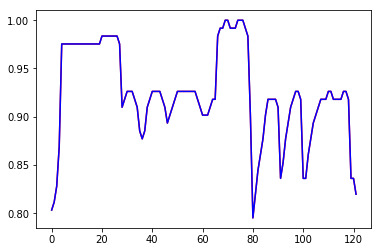

<Figure size 432x288 with 0 Axes>

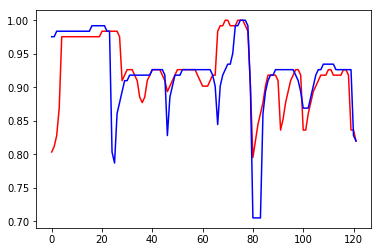

<Figure size 432x288 with 0 Axes>

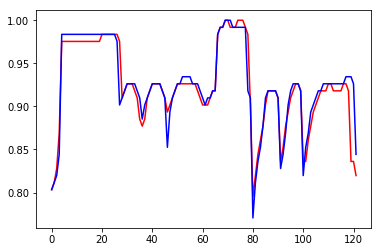

<Figure size 432x288 with 0 Axes>

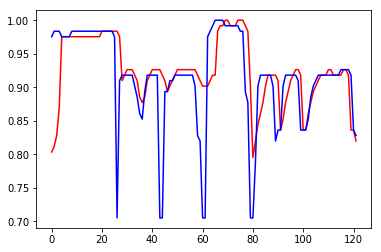

<Figure size 432x288 with 0 Axes>

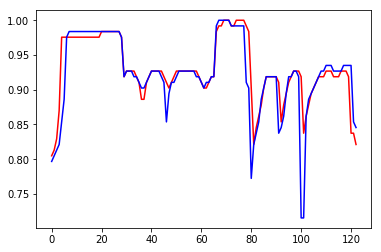

<Figure size 432x288 with 0 Axes>

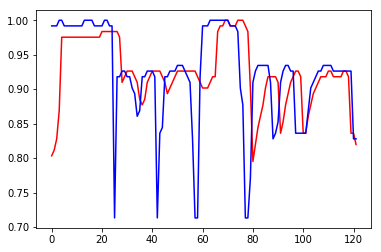

<Figure size 432x288 with 0 Axes>

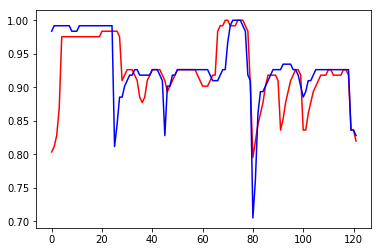

<Figure size 432x288 with 0 Axes>

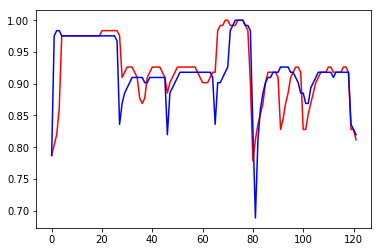

<Figure size 432x288 with 0 Axes>

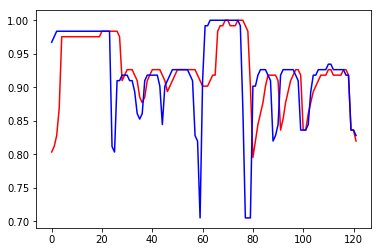

<Figure size 432x288 with 0 Axes>

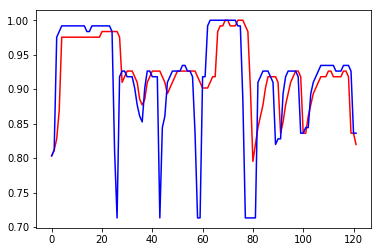

<Figure size 432x288 with 0 Axes>

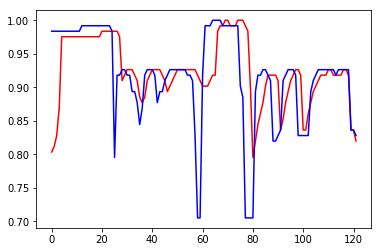

<Figure size 432x288 with 0 Axes>

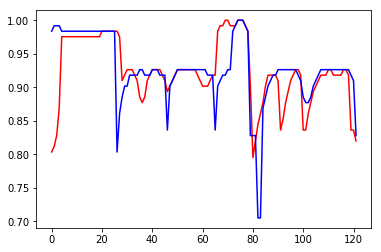

<Figure size 432x288 with 0 Axes>

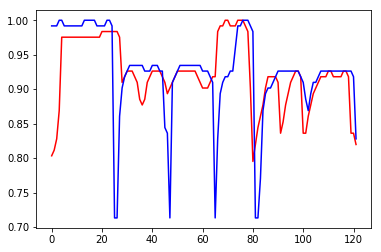

<Figure size 432x288 with 0 Axes>

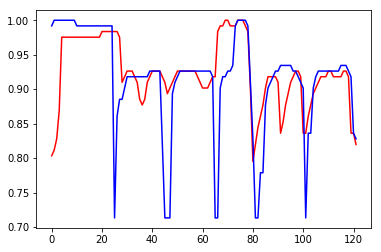

<Figure size 432x288 with 0 Axes>

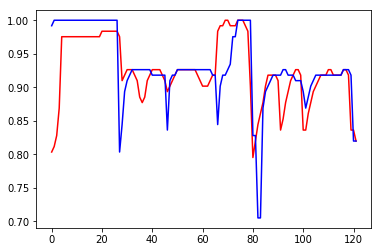

<Figure size 432x288 with 0 Axes>

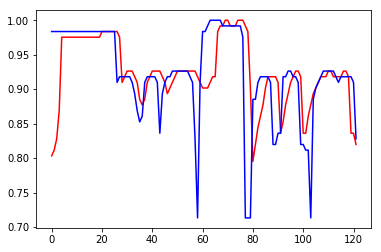

<Figure size 432x288 with 0 Axes>

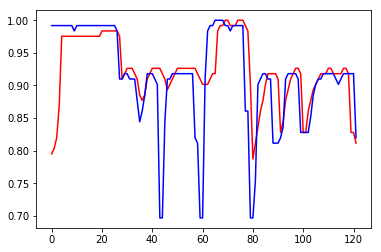

<Figure size 432x288 with 0 Axes>

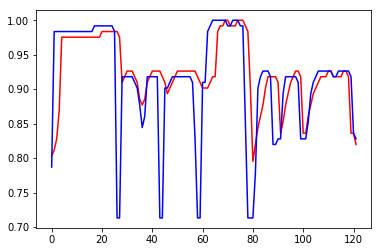

<Figure size 432x288 with 0 Axes>

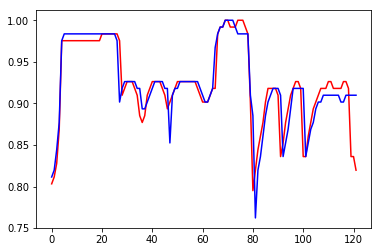

<Figure size 432x288 with 0 Axes>

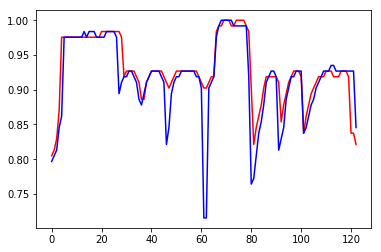

<Figure size 432x288 with 0 Axes>

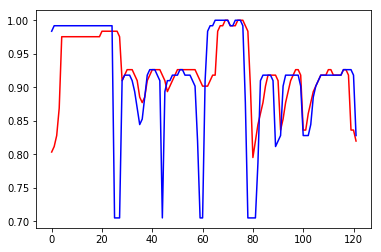

In [4]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr 


def cropImage(img):   
    

    #img=abs(img-255 )
    #img= cv2.bitwise_not(img).copy()
    #img = np.ones((3,5),dtype='int')
    countup=0
    for row in img:
        #print(str(row.sum()))
        if row.sum()==0:
            countup=countup+1
        else:
            #print(countup)
            break
    countdn=0
    for row in img[::-1]:
        #print(str(row.sum()))
        if row.sum()==0:
            countdn=countdn+1
        else:
            #print(countdn)
            break
    h=img.shape[0]
     #img = np.ones((3,5),dtype='int')
    
    
    #print(h)
    imgupdn=img[countup:h-countdn,:].copy()
    #plt.figure()
    #plt.imshow(imgupdn)
    
    #img=img.T
    
    
    img=imgupdn.T
    
     #img = np.ones((3,5),dtype='int')
    countup=0
    for row in img:
        #print(str(row.sum()))
        if row.sum()==0:
            countup=countup+1
        else:
            #print(countup)
            break
    countdn=0
    for row in img[::-1]:
        #print(str(row.sum()))
        if row.sum()==0:
            countdn=countdn+1
        else:
            #print(countdn)
            #countdn=coundn-1
            break
    h=img.shape[0]
    
    
    
    #print(h)
    imgupdn=img[countup:h-countdn,:].T.copy()
    
    
    #w=imgupdn.shape[1]
    #zerosRows= np.zeros((1,w),dtype='int')
    #imgupdn=np.r_[zerosRows,imgupdn]
    #imgupdn=np.r_[imgupdn,zerosRows]
    
    #h=imgupdn.shape[0]
    #zerosRows= np.zeros((h,1),dtype='int')
    #imgupdn=np.c_[zerosRows,imgupdn]
    #imgupdn=np.c_[imgupdn,zerosRows]
    
    
    
    #imgupdn=abs(imgupdn-255 )
    #imgupdn= cv2.bitwise_not(imgupdn).copy()
    return imgupdn


def paddImage(imgupdn,margin):
    #imgupdn= cv2.bitwise_not(imgupdn).copy()
    w=imgupdn.shape[1]
    zerosRows= np.zeros((margin,w),dtype='int')
    imgupdn=np.r_[zerosRows,imgupdn]
    imgupdn=np.r_[imgupdn,zerosRows]
    
    h=imgupdn.shape[0]
    zerosRows= np.zeros((h,margin),dtype='int')
    imgupdn=np.c_[zerosRows,imgupdn]
    imgupdn=np.c_[imgupdn,zerosRows]
    #imgupdn= cv2.bitwise_not(imgupdn)
    return imgupdn


def findUpperProfile(img3):
    mtrx=[]
    for col in img3.T:
        #print(col)
        count=0
        for row in col:
            
            #print(row)
            if row==0:
                count=count+1
                #print(count)
            else: 
                break
                
    
        #print('count=',count)
        mtrx.append(count)
    mtrx=np.asarray(mtrx)
    h=img3.shape[1]
    mtrx=h-mtrx
    mtrx = mtrx/max(mtrx)
    #mtrx = mtrx/max(mtrx)
    return mtrx


def  strechImages(img1,img2):
    
    #print(img1.shape,img2.shape)
    w=max(img1.shape[0],img2.shape[0])
    h=max(img1.shape[1],img2.shape[1])
    
    
    #print('h',h,'w',w)
    
    img1 = cv2.resize(img1,(int(h),int(w)))
    img2 = cv2.resize(img2,(int(h),int(w)))
    return img1,img2
    




    
files = [line.rstrip() for line in open("word/paulos.png.txt", 'r')]    
    
files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]


countQ=0
for file in files:
    countQ=countQ+1
    if countQ==1:
        #print("llll")
        imgQ = cv2.imread(file,0)
        imgQ= cv2.bitwise_not(imgQ).copy()
        #img= cv2.bitwise_not(img2)
        ##plt.figure()
        ##plt.imshow(img)
        imgQ=cropImage(imgQ)
        #img=paddImage(img,10)
        #imgQ=np.tile(imgQ, 3) 




interpList=[]
mtrxList=[]
metr=0

for file in files:
    metr=metr+1
    
    
    
    
    
    if metr>21:
        continue
    
    img = cv2.imread(file,0)
    img= cv2.bitwise_not(img).copy()
    img=cropImage(img)
    #img=paddImage(img,10)
    #img=np.tile(img, 3)
    
    
    
    
    imgQa,imga=strechImages(imgQ,img)
    
    X=findUpperProfile(imgQa)#changes because image resises
    Y=findUpperProfile(imga)
    
    
    
    
    
    #newimg = cv2.resize(oriimg,(int(newX),int(newY)))
    
    coef=pearsonr(X,Y) 
    #print('icon',metr,coef,np.std(X),np.std(Y))
    print(coef[0])
    plt.figure()
    #plt.xlabel(imga.shape)
    #plt.imshow(imga,cmap='gray')
    
    plt.figure()
    plt.plot(X,'r-')
    plt.plot(Y,'b-')
    #print(imga.shape)
    

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

0.0
0.0
0.0
0.2
1.0
1.0
0.0
0.0
0.0
0.0


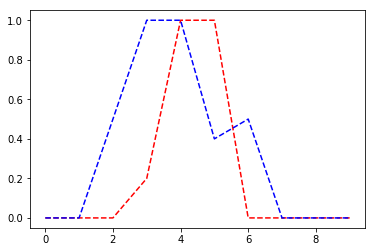

In [42]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr 
from scipy.stats.stats import  spearmanr



X=np.array([0,0,0,4,20,20,0,0,0,0])
Y=np.array([0,0,5,10,10,4,5,0,0,0])


x=   np.arange(0, X.shape[0], 1)



x2=   np.arange(0, Y.shape[0], 1)

max_X=max(X)
min_X=min(X)
max_Y=max(Y)
min_Y=min(Y)

DX=max(X)-min(X)
DY=max(Y)-min(Y)
X=X/DX
Y=Y/DY
X=X-min(X)
Y=Y-min(Y)



if max_Y>=max_X:
    #X=X*max_Y/max_X
    cc=0
else:
    #Y=Y*max_X/max_Y
    cc=0
    
#print(coef)


for xi in range(len(X)):
    print(X[xi])
    if X[xi]>0:
        cc=0




plt.figure()
plt.plot(x, X, 'r--', )
plt.plot(x2, Y, 'b--', )





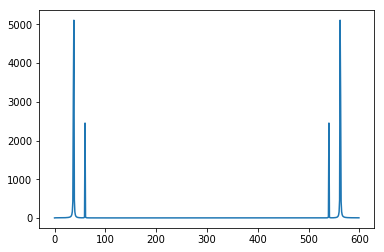

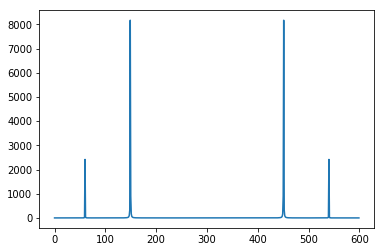

In [81]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy.fftpack import fft, ifft

def findFFT(samples):
    #samples=np.array([1,2,3,1,4,2])
    #samples = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

    top = np.max(samples)
    bottom = np.min(samples)
    mid = np.average(samples)
    normSamples = (samples - mid)
    #normSamples = (samples - 0)
    normSamples /= top - bottom

    spectrum = np.abs(fft(normSamples))
    spectrum *= spectrum


    #print(spectrum)
    #plt.plot(samples)
    plt.plot(spectrum)
    plt.show()
    
samples = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)    

findFFT(samples)
samples = np.sin(50.0 * 24.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) 
findFFT(samples)

from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
 
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.grid()
#plt.show()

TypeError: 'float' object cannot be interpreted as an integer

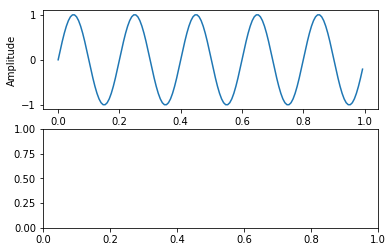

In [57]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y,Fs):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(n/2)] # one side frequency range

 Y = fft(y)/n # fft computing and normalization
 Y = Y[range(n/2)]
 
 plot(frq,abs(Y),'r') # plotting the spectrum
 xlabel('Freq (Hz)')
 ylabel('|Y(freq)|')

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = sin(2*pi*ff*t)

subplot(2,1,1)
plot(t,y)
xlabel('Time')
ylabel('Amplitude')
subplot(2,1,2)
plotSpectrum(y,Fs)
show()

In [63]:
import scipy.stats as stats
x1 = [12, 2, 1, 12, 2]
x2 = [15, 4, 2, 12, 3]
tau, p_value = stats.kendalltau(x1, x2)
tau

0.8944271909999157